In [1]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import datetime

In [2]:
# loading the dataset
data = pd.read_csv("./CleanData/data.merged.csv")

data.head()

,CT1,CT2,CT3,CT_Avg,total_current,state,created_at,therm_temp,vibration
0,0.000000,11.271318,14.648021,8.639779,25.919338,ON,2024-03-26T04:17:37.000000Z,26.383165,1902
1,12.206779,13.903328,10.293859,12.134656,36.403969,ON,2024-03-26T06:07:21.000000Z,31.782297,1903
2,1.157038,1.262079,1.147739,1.188952,3.566856,ON,2024-03-27T01:17:40.000000Z,25.015078,1850
3,1.429621,1.462852,1.459629,1.450701,4.352102,ON,2024-03-27T01:17:45.000000Z,24.980755,1931
4,1.383395,1.581238,1.362355,1.442329,4.326988,ON,2024-03-27T01:17:50.000000Z,25.004904,1815


In [3]:
# remove the created_at and state columns
data = data.drop(['state'], axis=1)

data.head()

,CT1,CT2,CT3,CT_Avg,total_current,created_at,therm_temp,vibration
0,0.000000,11.271318,14.648021,8.639779,25.919338,2024-03-26T04:17:37.000000Z,26.383165,1902
1,12.206779,13.903328,10.293859,12.134656,36.403969,2024-03-26T06:07:21.000000Z,31.782297,1903
2,1.157038,1.262079,1.147739,1.188952,3.566856,2024-03-27T01:17:40.000000Z,25.015078,1850
3,1.429621,1.462852,1.459629,1.450701,4.352102,2024-03-27T01:17:45.000000Z,24.980755,1931
4,1.383395,1.581238,1.362355,1.442329,4.326988,2024-03-27T01:17:50.000000Z,25.004904,1815


In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
# Initialize the model
iso_forest = IsolationForest(contamination=0.1)

In [6]:
X = data

pd.DataFrame(X)

,CT1,CT2,CT3,CT_Avg,total_current,created_at,therm_temp,vibration
0,0.000000,11.271318,14.648021,8.639779,25.919338,2024-03-26T04:17:37.000000Z,26.383165,1902
1,12.206779,13.903328,10.293859,12.134656,36.403969,2024-03-26T06:07:21.000000Z,31.782297,1903
2,1.157038,1.262079,1.147739,1.188952,3.566856,2024-03-27T01:17:40.000000Z,25.015078,1850
3,1.429621,1.462852,1.459629,1.450701,4.352102,2024-03-27T01:17:45.000000Z,24.980755,1931
4,1.383395,1.581238,1.362355,1.442329,4.326988,2024-03-27T01:17:50.000000Z,25.004904,1815
...,...,...,...,...,...,...,...,...
15404,1.190704,1.083099,1.135036,1.136280,3.408839,2024-08-10T06:18:13.000000Z,41.699657,1873
15405,3.768695,3.919246,3.917646,3.868529,11.605587,2024-08-10T06:18:18.000000Z,41.670242,1901
15406,3.933802,3.982554,3.588322,3.834893,11.504679,2024-08-10T06:18:23.000000Z,41.643696,1823
15407,1.279599,1.272777,1.131611,1.227996,3.683987,2024-08-10T06:18:53.000000Z,41.705498,1769


In [7]:
# 3d plot of the data cluster
from mpl_toolkits.mplot3d import Axes3D

In [8]:
X.head()

,CT1,CT2,CT3,CT_Avg,total_current,created_at,therm_temp,vibration
0,0.000000,11.271318,14.648021,8.639779,25.919338,2024-03-26T04:17:37.000000Z,26.383165,1902
1,12.206779,13.903328,10.293859,12.134656,36.403969,2024-03-26T06:07:21.000000Z,31.782297,1903
2,1.157038,1.262079,1.147739,1.188952,3.566856,2024-03-27T01:17:40.000000Z,25.015078,1850
3,1.429621,1.462852,1.459629,1.450701,4.352102,2024-03-27T01:17:45.000000Z,24.980755,1931
4,1.383395,1.581238,1.362355,1.442329,4.326988,2024-03-27T01:17:50.000000Z,25.004904,1815


In [9]:
# Drop the created_at column
Y = X['created_at']
X = X.drop(['created_at'], axis=1)

X.head()

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815


In [10]:
X.shape

(15409, 7)

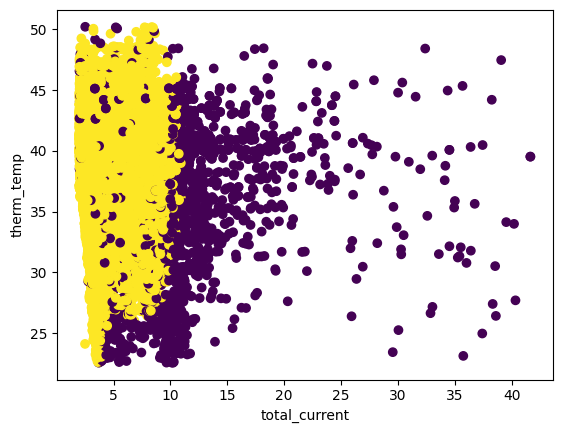

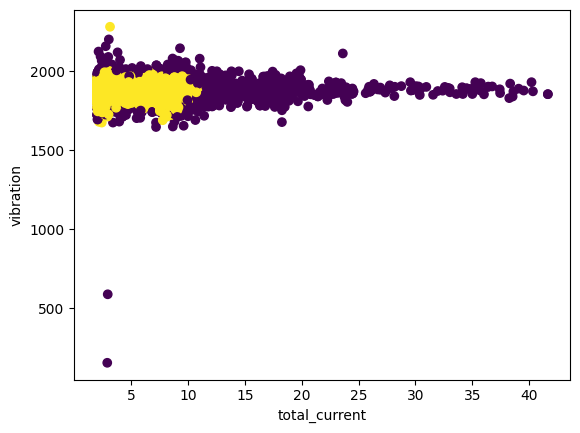

In [11]:
# Fit the model
iso_forest.fit(X)

# plot the cluster of the data ie total_current	vs therm_temp

plt.scatter(X['total_current'], X['therm_temp'], c=iso_forest.predict(X))
plt.xlabel('total_current')
plt.ylabel('therm_temp')
plt.show()


# plot the cluster of the data ie total_current	vs vibration

plt.scatter(X['total_current'], X['vibration'], c=iso_forest.predict(X))

plt.xlabel('total_current')
plt.ylabel('vibration')
plt.show()




In [12]:
# 3d plot of the data cluster
from mpl_toolkits.mplot3d import Axes3D


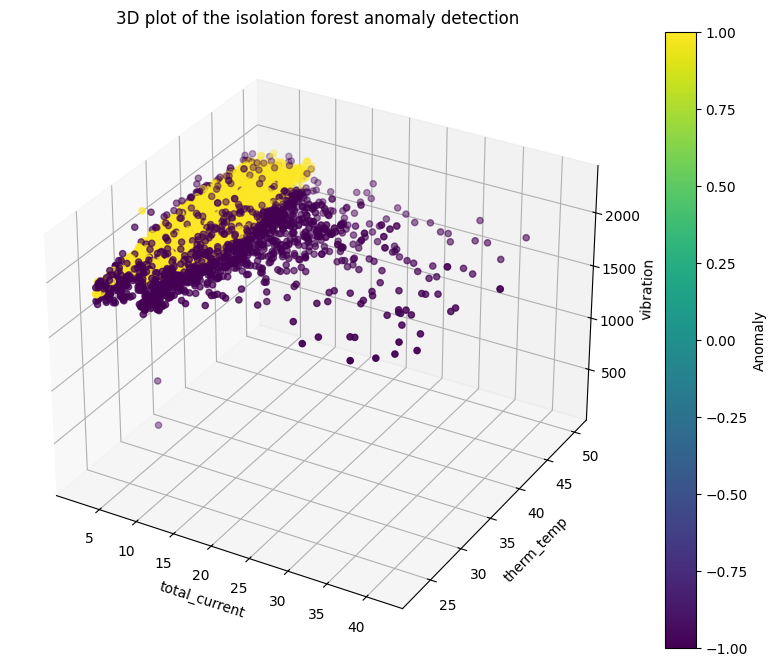

In [13]:
# plot the cluster of the data ie total_current vs amb_temp vs ambient_humidity 

fig = plt.figure(figsize=(10, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['total_current'], X['therm_temp'], X['vibration'], c=iso_forest.predict(X))
ax.set_xlabel('total_current')
ax.set_ylabel('therm_temp')
ax.set_zlabel('vibration')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Anomaly')

# lable
plt.title('3D plot of the isolation forest anomaly detection')

plt.show()

In [14]:
# Fit the model

iso_forest.fit(X)

# Predict the anomaly
anomaly = iso_forest.predict(X)

# Add the anomaly column to the dataset
X['anomaly'] = anomaly

pd.DataFrame(X)


,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,anomaly
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,-1
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,-1
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,1
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,-1
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,-1
...,...,...,...,...,...,...,...,...
15404,1.190704,1.083099,1.135036,1.136280,3.408839,41.699657,1873,1
15405,3.768695,3.919246,3.917646,3.868529,11.605587,41.670242,1901,-1
15406,3.933802,3.982554,3.588322,3.834893,11.504679,41.643696,1823,-1
15407,1.279599,1.272777,1.131611,1.227996,3.683987,41.705498,1769,1


In [15]:
X.size

123272

In [16]:
X['anomaly'].value_counts()

anomaly
 1    13868
-1     1541
Name: count, dtype: int64

In [17]:
# Convert the labels (-1 for anomaly, 1 for normal) to binary labels (1 for anomaly, 0 for normal)

X['anomaly'] = X['anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [18]:
pd.DataFrame(X)



,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,anomaly
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,1
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,1
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,0
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,1
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,1
...,...,...,...,...,...,...,...,...
15404,1.190704,1.083099,1.135036,1.136280,3.408839,41.699657,1873,0
15405,3.768695,3.919246,3.917646,3.868529,11.605587,41.670242,1901,1
15406,3.933802,3.982554,3.588322,3.834893,11.504679,41.643696,1823,1
15407,1.279599,1.272777,1.131611,1.227996,3.683987,41.705498,1769,0


In [19]:
# change the anomaly column name to classification

X = X.rename(columns={'anomaly': 'classification'})

# 1 is anomaly, 0 is normal
X['classification'].value_counts()

classification
0    13868
1     1541
Name: count, dtype: int64

In [20]:
X.head()

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,classification
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,1
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,1
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,0
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,1
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,1


In [21]:
pd.DataFrame(X)

,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,classification
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,1
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,1
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,0
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,1
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,1
...,...,...,...,...,...,...,...,...
15404,1.190704,1.083099,1.135036,1.136280,3.408839,41.699657,1873,0
15405,3.768695,3.919246,3.917646,3.868529,11.605587,41.670242,1901,1
15406,3.933802,3.982554,3.588322,3.834893,11.504679,41.643696,1823,1
15407,1.279599,1.272777,1.131611,1.227996,3.683987,41.705498,1769,0


In [22]:
import os

os.system('rm -rf DataSet')
os.system('mkdir DataSet')

0

In [23]:

# Save the data to a new csv file

X.to_csv('./DataSet/data.merged.csv', index=False)

# With created_at column

X['created_at'] = Y

X.head()


,CT1,CT2,CT3,CT_Avg,total_current,therm_temp,vibration,classification,created_at
0,0.000000,11.271318,14.648021,8.639779,25.919338,26.383165,1902,1,2024-03-26T04:17:37.000000Z
1,12.206779,13.903328,10.293859,12.134656,36.403969,31.782297,1903,1,2024-03-26T06:07:21.000000Z
2,1.157038,1.262079,1.147739,1.188952,3.566856,25.015078,1850,0,2024-03-27T01:17:40.000000Z
3,1.429621,1.462852,1.459629,1.450701,4.352102,24.980755,1931,1,2024-03-27T01:17:45.000000Z
4,1.383395,1.581238,1.362355,1.442329,4.326988,25.004904,1815,1,2024-03-27T01:17:50.000000Z


In [24]:
# Saving the data to a new csv file

X.to_csv('./DataSet/clean_data_with_created_at.csv', index=False)